<div align="right"><sub>Advanced Algorithms, Semester 2, 2020</sub>
</div>


# Assessment 2
Due Date: Friday, November 13th, 5pm.

Value: 25% of course mark

Every numbered task is worth 1 mark.

---


##### Learning outcomes
- <font size="1">1.	Critically evaluate the ecosystem of algorithmic tools available to solve complex computational problems in a variety of disciplines.</font>
- <font size="1">2.	Choose and implement state-of-the-art algorithms and data structures solutions for a variety of computational problems. </font>
- <font size="1">3.	Critically judge algorithmic performance and push for optimization of computational resources</font>

## Searching

<ol start="1">

<li>
Implement a recursive version of the binary search algorithm.
   
</li></ol>

In [1]:
# Solution
def binary_search(numlist, start, end, x): 
    if end >= start: 
        mid = (end + start) // 2
        if numlist[mid] == x: 
            return mid 
        elif numlist[mid] > x: 
            return binary_search(numlist, start, mid - 1, x) 
        else: 
            return binary_search(numlist, mid + 1, end, x) 
    else: 
        return False
    
def recursiveBinarySearch(testlist, number):
    result = binary_search(testlist,0,len(testlist)-1,number)
    if result:
        return True
    else:
        return False


In [2]:
# Test                   
testlist = [0, 1, 2, 8, 13, 17, 19, 32, 42]
print(recursiveBinarySearch(testlist, 3))
print(recursiveBinarySearch(testlist, 42))

False
True


<ol start="2">
<li> 
    <b>(Hard)</b> Write an algorithm to find whether a value exists in a sorted 2D matrix of dimensions $n \times n$. A sorted 2D matrix is a matrix where all the elements in a row are sorted, and all the elements in a column are also sorted. Take advantage of the sorted nature of the matrix in order to come up with an algorithm that is able to carry the search in $O(n)$ time complexity instead of the naïve $O(n^2)$

$$\begin{bmatrix}
20  & 40 & 63 & 80 \\
30  & 50 & 80 &  90 \\
40  & 60 & 100 & 110 \\
50  & 65 & 105 & 150 \\    
\end{bmatrix}$$
</li>  </ol>

In [3]:
# Solution
def findValueInSortedMatrix(mat, x): 
    m=len(mat[0]) - 1
    n = len(mat)
    i, j = m, 0 # set indexes for bottom 
                    # left element 
    while (i >= 0 and j < n): 
        if (mat[i][j] == x): 
            print(i,j)
            return True; 
        if (mat[i][j] > x): 
            i -= 1
        else: # if mat[i][j] < x 
            j += 1
    return False

In [4]:
# Test
matrix = [[20, 40, 63, 80],
          [30, 50, 80, 90],
          [40, 60, 110, 110],
          [50, 65, 105, 150]]

print(findValueInSortedMatrix(matrix,60)) #Item exists
print(findValueInSortedMatrix(matrix,49)) # Item doesn't exist

2 1
True
False


## Hashing

<ol start="3">

<li>
Implement a map data structure that maps strings to values (striving to search in $O(1)$ time) and uses chaining for collision resolution. Monitor the load factor of the data structure every time you add a new value and try to implement the functionality so your data structure dynamically doubles its size whenever the load factor $\lambda$ exceeds 0.7. Briefly describe the computational implication you face when trying to double the size of the data Hash Table.
</li></ol>    

In [5]:
# Solution
#when creating a new hash table using the size of the original hash table. we need to traverse to all the items,
#which is O(N) time. however, we only need to do it when it has a load factor  𝜆  more than 0.7
class HashTable:
    def __init__(self,size):
        self.size = size
        self.slots = [None] * self.size
        self.data = [None] * self.size
        self.item = 0
        
    def put(self,key,data):  
        hashvalue = self.hashfunction(key,len(self.slots))
        
        if self.slots[hashvalue] == None:
            self.slots[hashvalue] = key
            self.data[hashvalue] = data
            self.item+=1
            
        else:
            if self.slots[hashvalue] == key:
                self.data[hashvalue] = data  #replace
            else:
                nextslot = self.rehash(hashvalue,len(self.slots))
                while self.slots[nextslot] != None and self.slots[nextslot] != key:
                    nextslot = self.rehash(nextslot,len(self.slots))

                if self.slots[nextslot] == None:
                    self.slots[nextslot]=key
                    self.data[nextslot]=data
                    self.item+=1
                else:
                    self.data[nextslot] = data #replace  

        #check if slots is almost full            
        lambdavalue = self.item / self.size
        if(lambdavalue > 0.7):   
            newsize = self.size * 2
            tempslots = [None] * newsize
            tempdata = [None] * newsize    
            for i in range(self.size):
                tempslots[i] = self.slots[i]
                tempdata[i] = self.data[i]
            self.slots = tempslots
            self.data = tempdata
            self.size = newsize

    def hashfunction(self,astring,size):
        sum = 0
        for pos in range(len(astring)):
            sum = sum + ord(astring[pos])

        return sum%size

    def rehash(self,oldhash,size):
        return (oldhash+1)%size  

    def get(self,key):
        startslot = self.hashfunction(key,len(self.slots))

        data = None
        stop = False
        found = False
        position = startslot
        while self.slots[position] != None and not found and not stop:
            if self.slots[position] == key:
                found = True
                data = self.data[position]
            else:
                position=self.rehash(position,len(self.slots))
                if position == startslot:
                    stop = True
        return data

    def __getitem__(self,key):
        return self.get(key)

    def __setitem__(self,key,data):
        self.put(key,data) 

In [6]:
#Test
H=HashTable(size=3)
#print(H.slots,"->",H.data)

H["cat"]="Meow"
print(H.slots,"->",H.data)

H["dog"]="Woof"
print(H.slots,"->",H.data)

H["sheep"]="Baa"
print(H.slots,"->",H.data)

H["mouse"]="Squeak"
print(H.slots,"->",H.data)

H["duck"]="Quack"
print(H["mouse"]) # Notice that accessing a hash value by key still works

#With the next addition, the load factor exceeds 0.7
H["wolf"]="Ahh-wooo"
print(H.slots,"->",H.data)

['cat', None, None] -> ['Meow', None, None]
['cat', None, 'dog'] -> ['Meow', None, 'Woof']
['cat', 'sheep', 'dog', None, None, None] -> ['Meow', 'Baa', 'Woof', None, None, None]
['cat', 'sheep', 'dog', 'mouse', None, None] -> ['Meow', 'Baa', 'Woof', 'Squeak', None, None]
Squeak
['cat', 'sheep', 'dog', 'mouse', 'duck', None, None, None, 'wolf', None, None, None] -> ['Meow', 'Baa', 'Woof', 'Squeak', 'Quack', None, None, None, 'Ahh-wooo', None, None, None]


## Sorting



<ol start="4">

<li>
Insertion sort is very inefficient because of the number of comparisons needed on the growing sorted sublists. Take advantage of binary search to find the proper location to insert the selected item at each iteration and thus reduce the number of necessary comparisons carried out by insertion sort to $O(n log(n))$.
</li></ol>       

In [7]:
# Solution
def binary_search(numlist, start, end, x): 
    if start == end: 
        if numlist[start] > x: 
            return start 
        else: 
            return start+1
        if start > end: 
            return start 
    if start > end: 
        return start 

    mid = (start+end)//2
    if numlist[mid] < x: 
        return binary_search(numlist, mid+1, end, x) 
    elif numlist[mid] > x: 
        return binary_search(numlist, start, mid-1, x) 
    else: 
        return mid


def BinarySearchEnhancedInsertionSort(arr): 
    for i in range(1, len(arr)): 
        x = arr[i] 
        j = binary_search(arr, 0, i-1, x) 
        arr = arr[:j] + [x] + arr[j:i] + arr[i+1:] 
    return arr 

In [8]:
#Test
print("Sorted array:")
print(BinarySearchEnhancedInsertionSort([37, 23, 0, 17, 12, 72, 31,46, 100, 88, 54]))

Sorted array:
[0, 12, 17, 23, 31, 37, 46, 54, 72, 88, 100]


## Thinking exercise

<ol start="5">

<li>
    <b>(Hard)</b> Write an algorithm that takes in a list of $n$ integers in the range $0$ to $k$, preprocesses its input and then is able to answer queries about how many of the $n$ integers fall into a range $[a \dots b]$ in $O(1)$ time. The preprocessing running time of the algorithm should be at most $\Theta(n + k)$. For an input such as $a=[2,4,6,8,10]$, $n=5$ and the range is $2$ to $k=10$. After preprocessing, your algorithm should be able to return how many elements in `a` fall within a given range. For instance:
</li></ol> 

- `ElementsInIntervalCounterObject.numberOfElementsFallingWithin(4,8)` -> 3
- `ElementsInIntervalCounterObject.numberOfElementsFallingWithin(5,9)` -> 2
- `ElementsInIntervalCounterObject.numberOfElementsFallingWithin(5,5)` -> 0
- `ElementsInIntervalCounterObject.numberOfElementsFallingWithin(1,10)` -> 5

I recommend that you implement the algorithm within a Python class so you can use the constructor for doing the preprocessing.

In [9]:
# Solution
class ElementsInIntervalCounter:
    def __init__(self,numlist):
        self.count = [0] * (max(numlist) + 1)
        
        for i in numlist:
            self.count[i] += 1
        
        for i in range(len(self.count)):
            if i != 0:
                self.count[i] += self.count[i-1]         
        
    def numberOfElementsFallingWithin(self,start,end):
        if(end<=start):
            return 0
        else:
            return self.count[end] - self.count[start-1]


In [10]:
# Test
ElementsInIntervalCounterObject = ElementsInIntervalCounter([2,4,6,8,10])
print(f'ElementsInIntervalCounterObject.numberOfElementsFallingWithin(4,8)-> {ElementsInIntervalCounterObject.numberOfElementsFallingWithin(4,8)}')
print(f'ElementsInIntervalCounterObject.numberOfElementsFallingWithin(5,9)-> {ElementsInIntervalCounterObject.numberOfElementsFallingWithin(5,9)}')
print(f'ElementsInIntervalCounterObject.numberOfElementsFallingWithin(5,5)-> {ElementsInIntervalCounterObject.numberOfElementsFallingWithin(5,5)}')
print(f'ElementsInIntervalCounterObject.numberOfElementsFallingWithin(1,10)-> {ElementsInIntervalCounterObject.numberOfElementsFallingWithin(1,10)}')

ElementsInIntervalCounterObject.numberOfElementsFallingWithin(4,8)-> 3
ElementsInIntervalCounterObject.numberOfElementsFallingWithin(5,9)-> 2
ElementsInIntervalCounterObject.numberOfElementsFallingWithin(5,5)-> 0
ElementsInIntervalCounterObject.numberOfElementsFallingWithin(1,10)-> 5


## Probability

<ol start="6">

<li>
Let's create a very simple Bayesian spam filter. In imaginary land, emails are written with a vocabulary of only 6 words. Spam emails and not spam emails use the  six word vocabulary with different frequencies. 80% of the email traffic in imaginary land is spam and the reminder 20% is legitimate emails. You are given the task of creating a spam filter detection algorithm. You decide that is a good idea to exploit your knowledge of Bayesian statistics to tackle this problem. Thus, create an algorithm that given an input sentence (the email) returns the probability that the input sentence is spam and the probability that the input sentence is not spam.
</li>

Hint: the first thing to do is to estimate the probabilities of the vocabulary within the spam and not-spam categories

| Word  | Spam  |  Not spam |
|---|---|---|
| viagra| 0.26  |  0.05 |
| money | ... | ... |
| sex   | ... | ...  |
| dear  | ...  | ...  |
| friend  | ...  | ... |
| meet  | ... | ...  |

In [11]:
#Solution
import nltk
nltk.download('punkt')

vocabularies = ['viagra','money','sex','dear','friend','meet']

spamEmails=["viagra sex meet money sex", "dear viagra sex viagra viagra", "sex friend viagra", "sex money sex", "sex friend money"]
notSpamEmails=["dear friend money meet", "meet dear viagra friend", "friend meet dear", "dear dear friend", "dear sex", "sex dear"]

def calculateFrequencies(emails):
    vocabfreq ={}
    allwords = []
    for email in emails:
        words = nltk.word_tokenize(email)
        for word in words:
            allwords.append(word)
    for vocabulary in vocabularies:
        vocabcount = 0
        for word in allwords:
            if word == vocabulary:
                vocabcount+=1
            vocabfreq[vocabulary] = vocabcount/len(allwords)
    return vocabfreq


def bayesianSpamFilter(email,totalSpamWordsProbs,notSpamWordsProbs,fractionOfSpamEmails,fractionOfNotSpamEmails):
    emailtotalprobforspam = 1
    emailtotalprobfornotspam = 1
    for word in nltk.word_tokenize(email):
        emailtotalprobforspam = emailtotalprobforspam * totalSpamWordsProbs[word]
        emailtotalprobfornotspam = emailtotalprobfornotspam * notSpamWordsProbs[word]
    probofspam= (emailtotalprobforspam*fractionOfSpamEmails)/(emailtotalprobforspam*fractionOfSpamEmails+emailtotalprobfornotspam*fractionOfNotSpamEmails)
    probofnotspam= (emailtotalprobfornotspam*fractionOfNotSpamEmails)/(emailtotalprobforspam*fractionOfSpamEmails+emailtotalprobfornotspam*fractionOfNotSpamEmails)
    
    return (probofspam,probofnotspam)
       

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\ganie1\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [12]:
# Test 
#emails
spamEmails=["viagra sex meet money sex", "dear viagra sex viagra viagra", "sex friend viagra", "sex money sex", "sex friend money"]
notSpamEmails=["dear friend money meet", "meet dear viagra friend", "friend meet dear", "dear dear friend", "dear sex", "sex dear"]

spamWordsProbs = calculateFrequencies(spamEmails)
notSpamWordsProbs = calculateFrequencies(notSpamEmails)

#making sure probabilities add up to 1 (0.9999999 is fine). If this is not  the case, something is wrong in the probabilities estimation
totalSpamWordsProbs=0
totalNotSpamWordsProbs=0
for k,v in spamWordsProbs.items():
    totalSpamWordsProbs +=spamWordsProbs[k]#we could have also use v
    totalNotSpamWordsProbs += notSpamWordsProbs[k]

print(totalSpamWordsProbs,totalNotSpamWordsProbs)

fractionOfSpamEmails=0.8
fractionOfNotSpamEmails=0.2

email1 = "dear friend meet"
pSpam, pNotSpam = bayesianSpamFilter(email1,spamWordsProbs,notSpamWordsProbs,fractionOfSpamEmails,fractionOfNotSpamEmails)
print("Sentence: \"%s\" Probably spam: %f. Probability not spam: %f" % (email1, pSpam, pNotSpam))

email2 = "viagra money sex dear money"
pSpam, pNotSpam = bayesianSpamFilter(email2,spamWordsProbs,notSpamWordsProbs,fractionOfSpamEmails,fractionOfNotSpamEmails)
print("Sentence: \"%s\" Probably spam: %f. Probability not spam: %f" % (email2, pSpam, pNotSpam))

email3 = "dear friend meet sex sex money viagra meet"
pSpam, pNotSpam = bayesianSpamFilter(email3,spamWordsProbs,notSpamWordsProbs,fractionOfSpamEmails,fractionOfNotSpamEmails)
print("Sentence: \"%s\" Probably spam: %f. Probability not spam: %f" % (email3, pSpam, pNotSpam))

1.0 1.0
Sentence: "dear friend meet" Probably spam: 0.074912. Probability not spam: 0.925088
Sentence: "viagra money sex dear money" Probably spam: 0.985649. Probability not spam: 0.014351
Sentence: "dear friend meet sex sex money viagra meet" Probably spam: 0.791014. Probability not spam: 0.208986


## Stochastic Algorithms and the Monte Carlo Method

<ol start="7">

<li>
    Using the explanation given in lecture <i>19 Stochastic Algorithms</i>, Use the Monte Carlo method to estimate $\Large\pi$ (3.141592...) to 3 significant digits 
</li></ol>

In [13]:
#Solution
import random 
  
INTERVAL= 5000
  
circle_points= 0
square_points= 0
  

for i in range(INTERVAL**2): 
    rand_x= random.uniform(-1, 1) 
    rand_y= random.uniform(-1, 1) 
    origin_dist= rand_x**2 + rand_y**2
    if origin_dist<= 1: 
        circle_points+= 1
    square_points+= 1
    pi = 4* circle_points/ square_points 
  
  
print("Final Estimation of Pi=", pi)

Final Estimation of Pi= 3.141724


## Statistics


<ol start="8">

<li>
The company you have been working for has been purchasing a certain type of electronic device from 2 different manufacturers A and B. The company has also recorded historical data on the amount of days that each previous device  has worked until it completely failed. Given that one device has failed after 150 days but you don't know its manufacturer, calculate how much more likely it is that such a device came from one manufacturer than the other given the historical empirical data recorded by the company previously. 

<i>Hint:</i> plotting the probability density function of both manufacturers failing times will help you in finding a solution to this problem.
</li></ol>

In [14]:
import numpy as np
timeToFailureA= np.array([124.62144667, 106.13364854, 117.74858357,  98.74290026,
       103.3165112 , 109.72744164,  74.01571789, 106.96158141,
       102.28982005,  99.93051826,  76.60901943,  80.39714236,
        55.02793069,  85.45208982, 104.22170406,  85.99599947,
       112.59869994,  95.79109313,  83.50542866, 119.92770958,
        81.8058076 , 102.76322206,  99.67864073,  87.89222674,
        71.25176532,  74.88191707, 117.17865584, 109.09116925,
       124.53409657,  87.8173293 ,  99.85197306, 124.04364403,
       102.31833973, 119.2685315 , 112.25864129,  74.06716133,
        97.05767201,  83.66841935,  87.02851635,  91.66139228,
       104.88832752, 115.1732398 , 103.63461105,  78.2541082 ,
        74.35189505, 120.79622949, 106.16998993, 126.44951788,
        80.11259273, 112.08673548, 112.80531948, 122.5683024 ,
       120.50591968, 121.00171553,  70.26754123, 107.70698575,
       105.5337795 ,  86.12288747,  82.52946909, 115.65037522,
        79.24456862,  69.77690732,  91.86320981, 117.09220437,
       118.01883261,  98.33183627, 107.19247907,  97.10067157,
        85.06162182, 122.43982811,  71.85322262,  88.30531166,
        73.58362537,  87.83562595,  88.37756428, 131.28037359,
        92.65581904,  90.66214423,  97.51430688, 111.31124483,
       112.65648278, 118.5525132 ,  76.4713513 ,  98.49046739,
        74.24616398, 109.50293034,  88.4381382 ,  85.70565343,
       103.29975178,  83.72179567, 121.80909889, 128.71077746,
        75.52340396, 103.13401586,  94.65296786,  99.66973694,
        87.94468956, 126.09744162,  78.68529841,  95.27664898])
    
timeToFailureB= np.array([194.60055076, 127.84076582,  72.63459054,  72.14816055,
       113.55202239,  50.10477096, 116.65576045,  70.98809983,
        59.13363405,  82.27853051,  86.21977609, 122.06109083,
        39.79661448,  78.23934262, 138.79338423,  95.03231458,
        42.76667884,  72.52572671,  80.03069495,  40.64781381,
        62.95969861,  95.58983023, 124.48673192, 101.20750649,
        75.8133936 ,  30.28037538, 102.57269689, 144.30813776,
         8.349275  ,  87.56214613,  51.79287217,  92.36511375,
       132.2346495 ,  62.20459029, 105.31097184, 101.22537309,
        93.42104048,  72.02333095,  70.4659164 ,  73.40353751,
        43.78113965, 149.42580924,  65.80027562,  81.36351794,
        41.52233909,  72.17188767,  82.3835437 ,  92.35621193,
       111.01681144, 122.77975357,  88.7625561 ,  93.73549594,
       149.98888888,  98.02150134,  22.14345481,  89.31296595,
        90.81117642, 104.66191168,   8.64838967,  70.88562985,
        74.49570711, 103.97872516, 121.5995122 , 140.61780803,
        44.46878759,  76.73994346,  89.6503097 , 107.5186432 ,
        56.11700449, 152.05016799,  85.82639732,  21.0378077 ,
        93.06672928, 100.63602946, 108.24573072, 108.02669327,
       125.7566677 ,  89.48259258, 108.94840528, 101.68254614,
       106.09409152, 129.8037404 ,  89.62153564, 127.1854666 ,
        61.20319795,  96.35222993,  85.89363838,  93.17040435,
        87.61693674, 117.79106743,  97.59089942, 108.0501719 ,
        54.71134006,  48.52256069, 101.75135174,  29.61525461,
        40.66256675,  90.28140209, 108.52980168,  69.62657946])

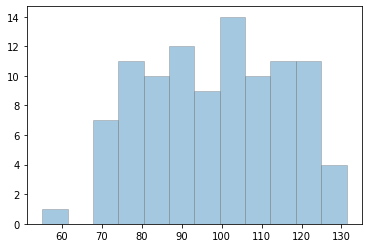

In [15]:
#solution
%matplotlib inline
import seaborn as sns
import numpy as np
from scipy import stats
import pandas as pd
import scipy.stats as st


sns.distplot(timeToFailureA, bins=12, kde=False, hist_kws=dict(edgecolor="gray", linewidth=1));


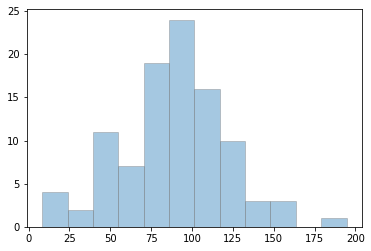

In [16]:
sns.distplot(timeToFailureB, bins=12, kde=False, hist_kws=dict(edgecolor="gray", linewidth=1));

In [17]:
x=150
meanOfA = timeToFailureA.mean()
stdA = timeToFailureA.std(ddof=0)
zvalueA = (x-meanOfA)/stdA
print(f'standard deviation of A {stdA}')
print(f'Likelihood of the machine being A {st.norm.pdf(zvalueA)}')
meanOfB = timeToFailureB.mean()
stdB = timeToFailureB.std(ddof=0)
zvalueB = (x-meanOfA)/stdB
a = st.norm(meanOfA,stdA)
b = st.norm(meanOfB,stdB)
print(f'standard deviation of B {stdB}')
print(f'Likelihood of the machine being B {st.norm.pdf(zvalueB)}')
print(f'B is {b.pdf(150)/a.pdf(150)} more likely to be the manufacturer')


standard deviation of A 17.069055662036316
Likelihood of the machine being A 0.00413387642965489
standard deviation of B 33.02563358815364
Likelihood of the machine being B 0.11770200197081483
B is 8.452217333364871 more likely to be the manufacturer


## Trees

<ol start="9">

<li>Using the <i>BinaryTree</i> class implementation from  <i>practical1</i> in the <i>trees and tree algorithms lecture</i> and a Queue data structure, implement a breadth first traversal of a binary tree, like the following:</li>
</li></ol>

![](./images/bsf.png)

In [18]:
from collections import deque

class BinaryTree:
    def __init__(self,rootObj):
        self.key = rootObj
        self.leftChild = None
        self.rightChild = None

    def insertLeft(self,newNode):
        if self.leftChild == None:
            self.leftChild = BinaryTree(newNode)
        else:
            t = BinaryTree(newNode)
            t.leftChild = self.leftChild
            self.leftChild = t

    def insertRight(self,newNode):
        if self.rightChild == None:
            self.rightChild = BinaryTree(newNode)
        else:
            t = BinaryTree(newNode)
            t.rightChild = self.rightChild
            self.rightChild = t


    def getRightChild(self):
        return self.rightChild

    def getLeftChild(self):
        return self.leftChild

    def setRootVal(self,obj):
        self.key = obj

    def getRootVal(self):
        return self.key
    
    def breadth_first_traversal(self,tree):
        if tree is None:  
            return
        q = deque()
  
        # Enqueue Root and initialize height  
        q.append(tree)  

        while(len(q) > 0):  
            # Print front of queue and remove it from queue  
            tree = q.popleft()  
            if(tree is not None):
                print(tree.key) 

                #Enqueue left child  
                if tree.leftChild is not None:  
                    q.append(tree.leftChild)  

                # Enqueue right child  
                if tree.rightChild is not None:  
                    q.append(tree.rightChild)  

In [19]:
# Test    
t = BinaryTree(1)
t.insertLeft(2)
t.getLeftChild().insertLeft(4)
t.getLeftChild().insertRight(5)
t.insertRight(3)
#t.getRightChild().getRootVal()
t.breadth_first_traversal(t)

1
2
3
4
5


<ol start="10">
    <li>
        Using the `buildHeap` from the <i>practical</i> in the <i>trees and tree algorithms lecture</i>, write a sorting function that can sort a list in $O(n log(n))$ time.
</li></ol>

In [20]:
#Solution
class BinaryHeap:
    def __init__(self):
        self.heapList = [0]
        self.currentSize = 0        
        
    def percUp(self,i):
        while i // 2 > 0:
            if self.heapList[i] < self.heapList[i // 2]:
                tmp = self.heapList[i // 2]
                self.heapList[i // 2] = self.heapList[i]
                self.heapList[i] = tmp
            i = i // 2        
          
    def insert(self,k):
        self.heapList.append(k)
        self.currentSize = self.currentSize + 1
        self.percUp(self.currentSize)          
        
    def percDown(self,i):
        while (i * 2) <= self.currentSize:
            mc = self.minChild(i)
            if self.heapList[i] > self.heapList[mc]:
                tmp = self.heapList[i]
                self.heapList[i] = self.heapList[mc]
                self.heapList[mc] = tmp
            i = mc

    def minChild(self,i):
        if i * 2 + 1 > self.currentSize:
            return i * 2
        else:
            if self.heapList[i*2] < self.heapList[i*2+1]:
                return i * 2
            else:
                return i * 2 + 1        
                
    def delMin(self):
        retval = self.heapList[1]
        self.heapList[1] = self.heapList[self.currentSize]
        self.currentSize = self.currentSize - 1
        self.heapList.pop()
        self.percDown(1)
        return retval                
        
    def buildHeap(self, alist):
        i = len(alist) // 2
        self.currentSize = len(alist)
        self.heapList = [0] + alist[:]
        while (i > 0):
            self.percDown(i)
            i = i - 1

            
    def heapSort(self, alist):
        self.buildHeap(alist)
        sortedList = []
        for i in range(len(self.heapList)-1):
            sortedList.append(self.delMin())
        return sortedList

In [21]:
#Test
bh = BinaryHeap()
s=bh.heapSort([9,14,11,17,18,19, 21, 33, 27])
print(s)

[9, 11, 14, 17, 18, 19, 21, 27, 33]


## Binary search trees

<ol start="11">

<li>
Write a function (or a couple of functions) that are able to check whether a binary tree is a valid binary search tree (BST). Recall that a binary search tree relies on the <i>bst</i> property: keys that are less than the parent are found in the left subtree, and keys that are greater than the parent are found in the right subtree
</li>

In [22]:
def validateBinaryTree(mytree):
    node = mytree.root
    return (isBST(node,None,None)) 

def isBST(root, l = None, r = None):  
  
    # Base condition  
    if (root == None) : 
        return True
  
    # if left node exist then check it has  
    # correct data or not i.e. left node's data  
    # should be less than root's data  
    if (l != None and root.key <= l.key) : 
        return False
  
    # if right node exist then check it has  
    # correct data or not i.e. right node's data  
    # should be greater than root's data  
    if (r != None and root.key >= r.key) : 
        return False
  
    # check recursively for every node.  
    return isBST(root.hasLeftChild(), l, root) and isBST(root.hasRightChild(), root, r)  

Use the following code that creates a binary search tree to check your solution:

In [23]:
# Test
from utils import TreeNode, BinarySearchTree

mytree = BinarySearchTree()
mytree.put(1,1)
mytree.put(3,3)
mytree.put(2,2)

#so we have created a binary search tree that looks like this:

# 1
#  \
#   3
#  /   
# 2

# check that is a valid binary search tree with the validate function you should have implemented above
print(validateBinaryTree(mytree)) #Should return True

# Let's break the binary search tree property:
mytree.root.key = 5

# now the tree looks like this:

# 5
#  \
#   3
#  /   
# 2

# and is clearly not a binary search tree (the right child of the root key is not larger than the root key)

# our validateBinaryTree function should detect that this object is no longer a binary search three:

print(validateBinaryTree(mytree)) #Should return False

True
False


## Genetic algorithms

<ol start="12">

<li>
    <b>(Hard)</b>... but fun AND powerful technique if you get it working!). In this task you need to create a genetic/evolutionary algorithm that evolves a randomly initialized "chromosome" into an approximation to a target image. 
</li>
</ol>

- As fitness function, I suggest that you calculate the matrix difference between the target image and a candidate solution from the population and then take the norm of the matrix `np.linalg.norm()` to get a scalar number that quantifies the "size" of the matrix (i.e. the distance between the target image and a candidate solution). Notice that with such a fitness function, the fittest candidates solutions will have a low score (i.e. low distance to the target function)

- To ensure that the required computation time does not get too large, we will reduce the target image to a relatively low resolution (50x50 pixels)

- Use a population size of around 500 chromosomes/individuals

- I recommend that you use a mutation rate of around 1%

- I recommend that you use random crossover points to speed up convergence upon the solution

- your solution should be computationally efficient, I should not need more than 5 minutes to run it

- Store partial solutions during the evolutionary process in a variable list named `solutionsList` so I can test that your algorithm works

50 50


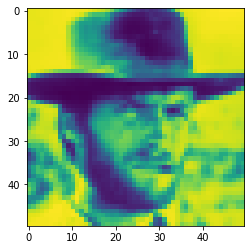

In [24]:
#some preliminary code to help you get started
%matplotlib inline
import matplotlib.pyplot as plt
import scipy
from scipy import misc
import numpy as np
import sys
import imageio
import skimage.transform

#you can work with any one of the following images
#target = misc.imread('./images/lena.png')
# target = imageio.imread('./images/lena.png')
# target = imageio.imread('./images/sm.jpg')[:,:,0]
target = imageio.imread('./images/ce.jpg')[:,:,0]

#New way of resizing and normalization:
#we decrease the resolution of the target image to 50 x 50 pixels in order to speed up computation time
#pixel values are also normalized by default from a [0-255] range to a more convenient [0-1] range 
target=skimage.transform.resize(target, (50,50), mode= 'reflect',anti_aliasing=True) 

#Old way of resizing and normalization:
#we decrease the resolution of the target image to 50 x 50 pixels in order to speed up computation time
#target=scipy.misc.imresize(target, (50,50))
#we normalize the pixel values manually from a range [0-255] to a more convenient range [0-1]
#target = target/255

plt.imshow(target)

xDim=target.shape[0]
yDim=target.shape[1]
print(xDim,yDim)

#dimensions of chromosomes (i.e. candidate solutions in the population)
dim =xDim*yDim

#we transform our target into a one-dimensional array for ease of computation
target1D=target.flatten() 

#the mutation rate you should use 
mutationRate= 0.01

# Population size
populationSize = 500

In [25]:
#Solution
#const
NUMBER_OF_GENERATION = 1500
PARENT_SIZE = 250
CHILD_SIZE = 250
HALF_CHILD = 125
TOTAL_PIXEL = 2500
mutationRate = int(populationSize * mutationRate)
#declare list/dict for algorithm
generation_top_score=[]
solutionsList = []
population = dict.fromkeys(range(populationSize),0)
fitnessScore = dict.fromkeys(range(populationSize),0)
parent = dict.fromkeys(range(PARENT_SIZE),0)
child = dict.fromkeys(range(CHILD_SIZE),0)
parent_child = dict.fromkeys(range(populationSize),0)

#uniform cross mixing 2 parents
def uniform_cross(p1,p2,randtimes): 
    tempp1 = p1.copy()
    tempp2 = p2.copy()
    for i in range(randtimes):
        tempnumb = np.random.randint(TOTAL_PIXEL)
        temparr = tempp1[tempnumb] 
        tempp1[tempnumb] = tempp2[tempnumb]
        tempp2[tempnumb] = temparr
    return tempp1,tempp2


#initial random population
for pops in range(populationSize):
    temp = np.random.random(2500)
    population[pops]=temp
    tempScore = abs(np.subtract(target1D,population[pops]))
    fitnessScore[pops] = np.linalg.norm(tempScore)

fitnessScore = sorted(fitnessScore.items(),key=lambda x: x[1])


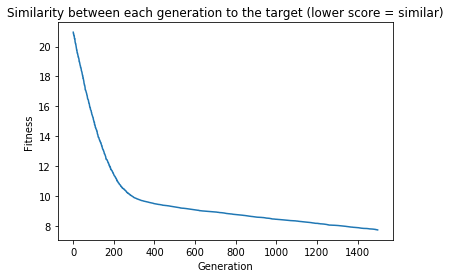

In [26]:
 for j in range(NUMBER_OF_GENERATION):
    #populate population with parents
    for i in range(PARENT_SIZE):
        parent[i] = population[fitnessScore[i][0]]
        
    #create child
    for i in range(HALF_CHILD):
        reverseIdx = 249-i
        child1,child2 = uniform_cross(parent[i],parent[reverseIdx],250)
        child[i] = child1
        child[HALF_CHILD+i] = child2
        
    #populate child to population
    for i in range(CHILD_SIZE):
        parent_child[i] = parent[i]
        parent_child[i+CHILD_SIZE] = child[i]   

    #create dictionary of fitness score to remeber the index of the population with the highest score
    fitnessScore = dict.fromkeys(range(populationSize),0)  
    
    #mutation
    for i in range(mutationRate):
        parent_child[np.random.randint(populationSize)][np.random.randint(TOTAL_PIXEL)] = np.random.uniform(0, 1)   
     
    #calculate the similarity between the population with the target
    for pops in range(populationSize):    
        population[pops]=parent_child[pops]        
        tempScore = abs(np.subtract(target1D,population[pops]))
        fitnessScore[pops] = np.linalg.norm(tempScore)
    
    #sort the fitness score from low to high
    fitnessScore = sorted(fitnessScore.items(),key=lambda x: x[1])  
    #add the best lowest score population to the generations
    generation_top_score.append(fitnessScore[0][1])
    #add the best lowest score population to the solutionlist and reshape to be 2d
    solutionsList.append(np.reshape(population[fitnessScore[0][0]], (-1, 50)))

    
plt.title('Similarity between each generation to the target (lower score = similar)')
plt.xlabel('Generation')
plt.ylabel('Fitness')
plt.plot(generation_top_score)

This is an illustration of the sample outputs I get during the evolutionary process every 500 steps for a total of 10,000 steps. The computation takes less than two minutes in my modest laptop. Obviously, better results can be achieved with more computational steps, a larger population or fine-tuning parameters such as the mutation rate, the fitness selection algorithm or the cross over point criteria, but as a proof of concept, this should be enough. Notice that the algorithm progresses very fast in terms of fitness at the beginning of the evolutionary procedure and eventually slows down towards the end.

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  


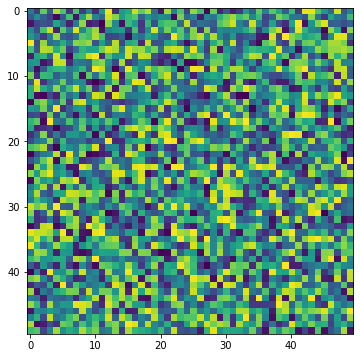

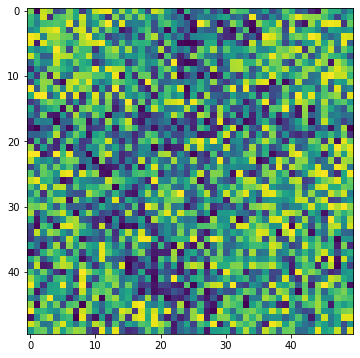

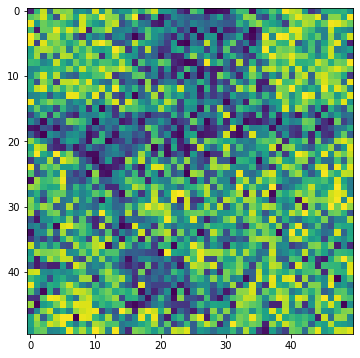

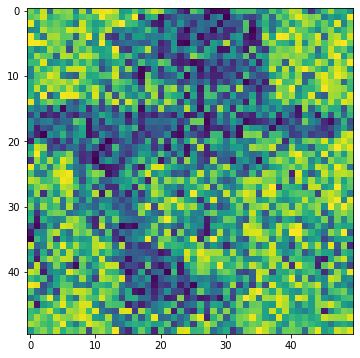

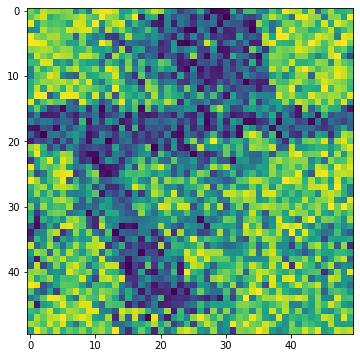

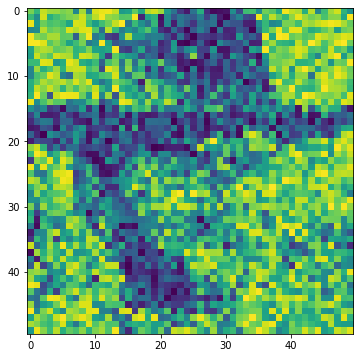

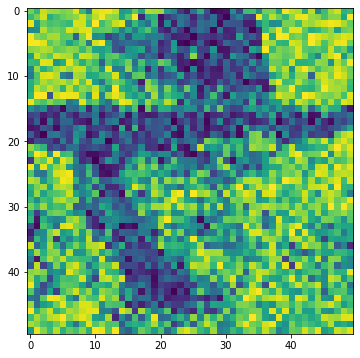

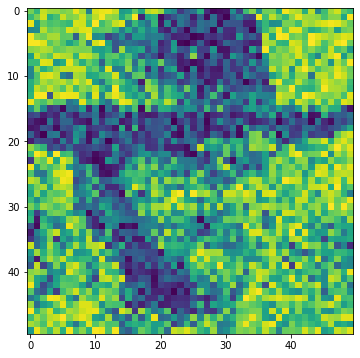

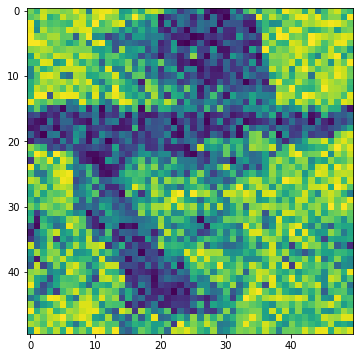

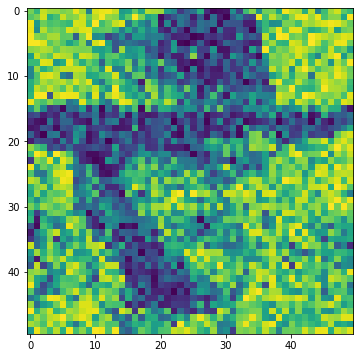

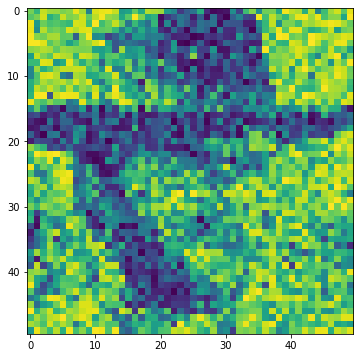

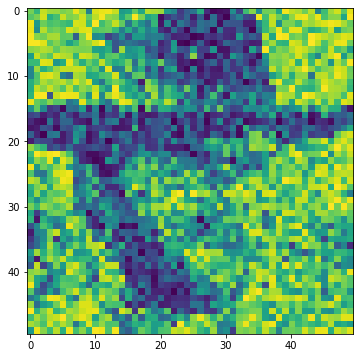

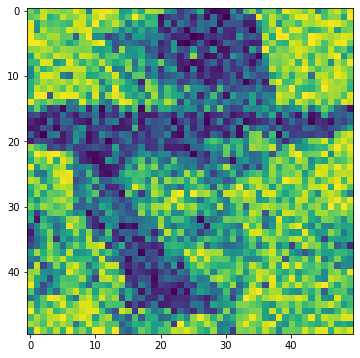

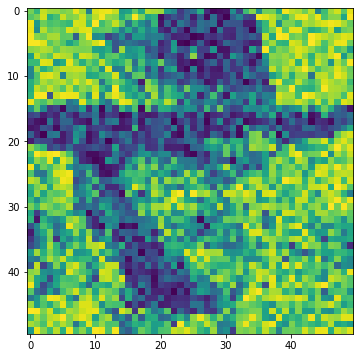

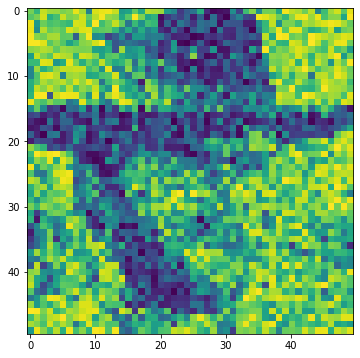

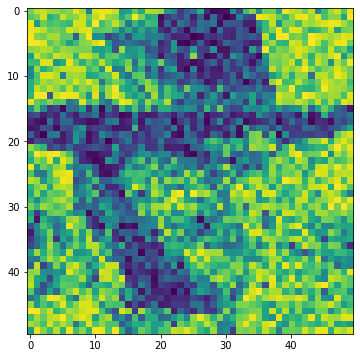

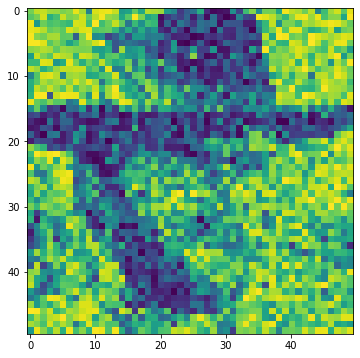

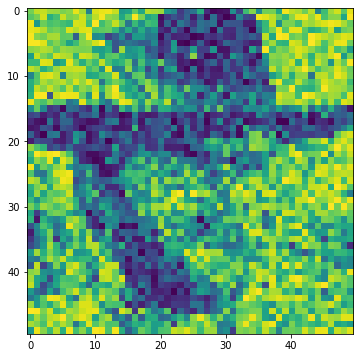

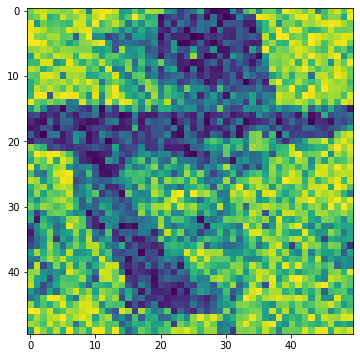

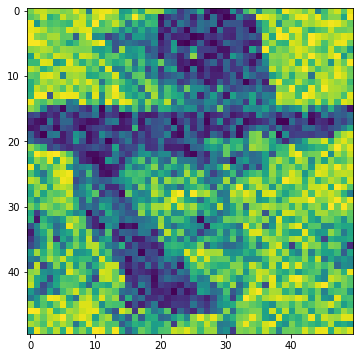

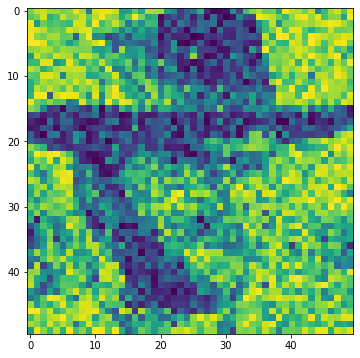

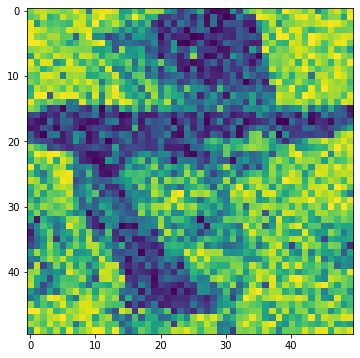

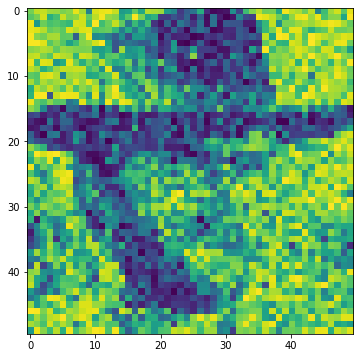

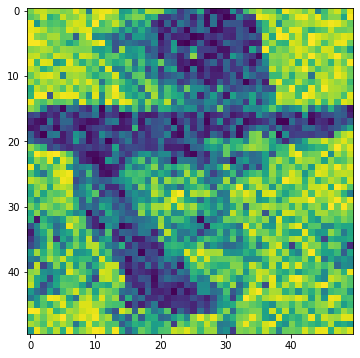

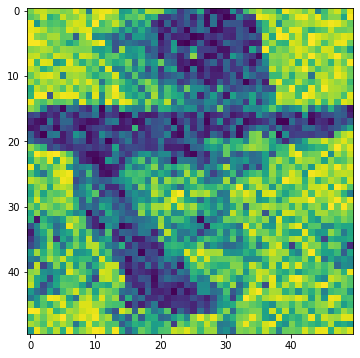

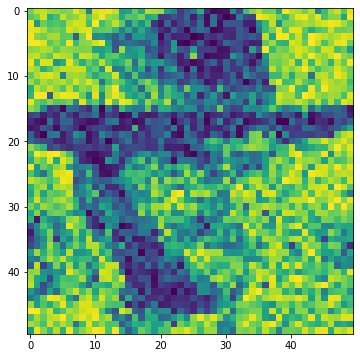

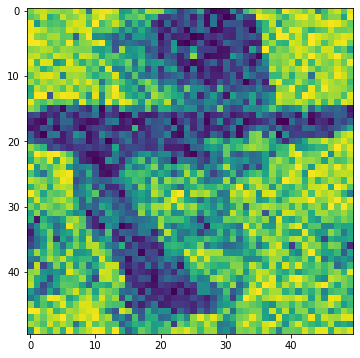

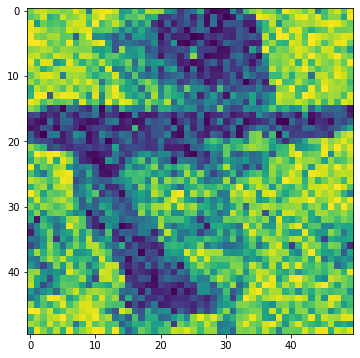

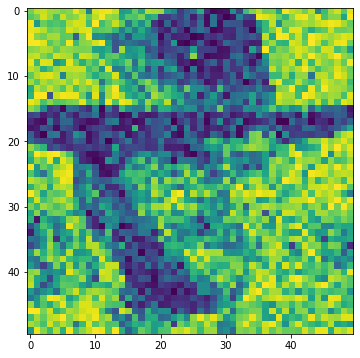

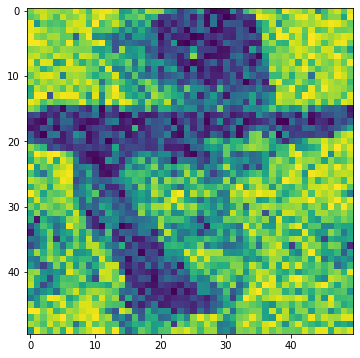

In [27]:
%matplotlib inline
# for i in solutionsList:
#     plt.figure(figsize=(9, 6))
#     plt.imshow(i)
for i in range(0,len(solutionsList),50):
    plt.figure(figsize=(9, 6))
    plt.imshow(solutionsList[i])

## Graphs

<ol start="13">

<li>
The following graph `f` describes flight connections between different cities in the world. You're trying to create a flight search engine that minimizes the number of flights to get from one city to another. Show the solution to this problem by finding the shortest path from Dunedin to Rome.
</li>

In [28]:
#Solution
from utils import Graph, Vertex, Queue
f = Graph()
f.addVertex('Dunedin');f.addVertex('Wellington');f.addVertex('Auckland');f.addVertex('Queenstown');f.addVertex('Christchurch');
f.addVertex('Tauranga');f.addVertex('London');f.addVertex('New York');f.addVertex('Berlin');f.addVertex('Beijing');
f.addVertex('Tokyo');f.addVertex('Moscow');f.addVertex('Rome');f.addVertex('Paris');f.addVertex('Brussels');
f.addVertex('Washington DC');f.addVertex('Los Angeles');f.addVertex('San Francisco');f.addVertex('Dubai');
f.addVertex('New York'); f.addVertex('Santiago de Chile')
            
f.addEdge('Dunedin','Auckland')
f.addEdge('Auckland','Beijing')
f.addEdge('Tokyo','London')
f.addEdge('Dunedin','Wellington')
f.addEdge('London','Madrid')
f.addEdge('Madrid','Rome')
f.addEdge('Tokyo','Rome') #
f.addEdge('Auckland','Santiago de Chile')
f.addEdge('Auckland','San Francisco')
f.addEdge('Santiago de Chile','New York')
f.addEdge('Auckland','Dubai')
f.addEdge('Dubai','Rome')
f.addEdge('Beijing','Tokyo')
f.addEdge('San Francisco','Tokyo')
f.addEdge('San Francisco','New York')
f.addEdge('Los Angeles','San Francisco')
f.addEdge('New York','London')
f.addEdge('New York','London')

def bfs(g,start):
    start.setDistance(0)
    start.setPred(None)
    vertQueue = Queue()
    vertQueue.enqueue(start)
    while (vertQueue.size() > 0):
        currentVert = vertQueue.dequeue()
        for nbr in currentVert.getConnections():
            if (nbr.getColor() == 'white'):
                nbr.setColor('gray')
                nbr.setDistance(currentVert.getDistance() + 1)
                nbr.setPred(currentVert)
                vertQueue.enqueue(nbr)
        currentVert.setColor('black')
        
def traverse(y):
    x = y
    while (x.getPred()):
        print(x.getId())
        x = x.getPred()
    print(x.getId())

In [29]:
#Test
bfs(f,f.getVertex('Dunedin'))
traverse(f.getVertex('Rome'))
f.getVertex('Rome').getDistance()

Rome
Dubai
Auckland
Dunedin


3

<ol start="14">

<li>
The following graph represents latencies (in seconds) within a computer network for packages to travel from one router to another. Using an appropriate algorithm estimate what would be the minimum total latency to go from `routerA' to 'routerK'. Also, extract from the computational graph the optimal route.
</li>

![](./images/routerNetwork.png)

In [30]:
#Solution
from utils import PriorityQueue, Graph, Vertex
                
g = Graph()
g.addVertex('routerA');g.addVertex('routerB');g.addVertex('routerC');g.addVertex('routerD');g.addVertex('routerE');
g.addVertex('routerF');g.addVertex('routerG');g.addVertex('routerH');g.addVertex('routerI');g.addVertex('routerJ');
g.addVertex('routerK');

g.addEdge('routerA','routerB',1)
g.addEdge('routerA','routerC',1)
g.addEdge('routerA','routerD',2)

g.addEdge('routerB','routerE',3)
g.addEdge('routerB','routerF',4)
g.addEdge('routerC','routerG',3)
g.addEdge('routerD','routerG',1)

g.addEdge('routerE','routerH',3)
g.addEdge('routerE','routerI',3)
g.addEdge('routerE','routerF',2)
g.addEdge('routerF','routerI',1)
g.addEdge('routerG','routerF',4)
g.addEdge('routerG','routerI',2)
g.addEdge('routerG','routerJ',4)

g.addEdge('routerH','routerK',1)
g.addEdge('routerH','routerI',1)
g.addEdge('routerI','routerK',2)
g.addEdge('routerJ','routerK',1)

def dijkstra(aGraph,start):
    
    pq = PriorityQueue()
    start.setDistance(0)
    pq.buildHeap([(v.getDistance(),v) for v in aGraph])
    while not pq.isEmpty():
        currentVert = pq.delMin()
        for nextVert in currentVert.getConnections():
            newDist = currentVert.getDistance() + currentVert.getWeight(nextVert)
            if newDist < nextVert.getDistance():
                nextVert.setDistance( newDist )
                nextVert.setPred(currentVert)
                pq.decreaseKey(nextVert,newDist)
     
                
                


start=g.getVertex('routerA')               
dijkstra(g,start)
# for i in g.getVertex('routerK').pred:
#     print(i)
print(f"The shortest distance from a to k is: {g.getVertex('routerK').dist}") 

print('The path from k to a is')
tempnode = g.getVertex('routerK')
while(tempnode!=None):
      tempnode = tempnode.pred
      if tempnode != None:
          print(tempnode.id)

The shortest distance from a to k is: 7
The path from k to a is
routerI
routerG
routerD
routerA


<ol start="15">

<li>
This question does not require you to write any code, but perhaps it would be helpful for you to grab a pen and a paper and think hard about it. Let's say you need to explore a huge tree. Imagine you are creating a web crawler that is trying to index a huge Internet domain (for example www.amazon.com) by following every link found during the crawling. The crawling starts from the root URL of the domain and proceeds by recursively following every link found in each html page. The only requirement is that each link to be followed has to point within the domain (that is, a link found to an outside domain for example www.google.com is not followed, otherwise the crawling would not end in a reasonable amount of time). Links that have already been parsed are ignored. In essence, you are trying to traverse the tree represented by the domain. You are trying to decide whether to implement breadth first search or depth first search to manage the list of links popping up during crawling and that need to be followed up by the crawler. Which approach would be easier on RAM memory? (i.e. consumes less memory) <i>Hint:</i> Breadth first search builds a search tree one level at a time and stores every link found into a Queue. Depth first search creates a search tree by exploring one branch of the tree as deeply as possible (usually with a maximum depth threshold constraint) and stores every link found into a Stack. 
</li>
</ol>


###### I would think using depth first search would be easier on RAM memory. This is because breadth first will have to store an entire level. When the layer is really deep and has many nodes on each layers it will have to keep all those nodes on that layer in memory. The memory will have exponential grown everytime each layers gets deeper. 

###### However, using depth first we only need to keep each node as deep as the the layers. Once we parse the visited website we can remove it from the stack and go through another path. Which will save us having to save an entire layers in memory. we jsut have to save the maximum depth of the website.


## Cryptocurrencies

A hash function is a function that takes as input a variable length sequence of bytes and converts it to a fixed length sequence. It is a one way function. This means if `f` is the hashing function, calculating `f(x)` is pretty fast and simple, but trying to obtain `x` again from `f(x)` is hard or impossible. The value returned by a hash function is often called a hash, message digest, hash value, or checksum. Most of the time a hash function will produce a unique output for a given input. However depending on the algorithm, there is a possibility to find a collision due to the mathematical theory behind these functions. That is, two different inputs mapping to the same hash value.

Hash functions are used inside some cryptographic algorithms (such as cryptocurrencies), in digital signatures, message authentication codes, manipulation detection, fingerprints, checksums (message integrity check), hash tables, password storage and much more.

<ol start="16">

<li>
Your task in this exercise is similar to Bitcoin mining: find a string of length 4 (i.e. `abcd`) containing only upper or lower case characters (i.e. `abcdefghijklmnopqrstuvwxyzABCDEFGHIJKLMNOPQRSTUVWXYZ`) whose hexadecimal SHA256 Hash digest starts with 6 0s (i.e. '000000')
</li>
</ol>

In [31]:
#Illustration code of SHA256 at work
import string
import hashlib

hash_object = hashlib.sha256(b'abcd')
hex_dig = hash_object.hexdigest()
print(hex_dig)

88d4266fd4e6338d13b845fcf289579d209c897823b9217da3e161936f031589


In [41]:
#Solution

import random   
import string
import hashlib
import itertools
def get_random_string(length):
    # Random string with the combination of lower and upper case
    letters = string.ascii_letters
    result_str = ''.join(random.choice(letters) for i in range(length))
    return result_str

def convertTuple(tup): 
    str =  ''.join(tup) 
    return str

allchar = 'abcdefghijklmnopqrstuvwxyzABCDEFGHIJKLMNOPQRSTUVWXYZ'
allcomb = list(itertools.combinations_with_replacement(allchar,4))
comblength = (len(allcomb))

four_char_string = ''
hex_dig = ''
i=0
stop = False

    
while stop==False and i<=comblength-1:
    currcomb = list(itertools.permutations(allcomb[i],4))
    currcomblength = (len(allcomb))
    for j in currcomb:
        four_char_string = convertTuple(j)
        hash_object = hashlib.sha256(four_char_string.encode('utf-8'))
        hex_dig = hash_object.hexdigest()
        if(hex_dig[:6] == '000000'):
            print('Found')
            print(f'String for leading 6 0\'s is {four_char_string}')
            print(f'Hash: {hex_dig}')
            stop = True
    i+=1
    


SzeB
00000027615bf9e183ac41707b329cf449f983c8576ed810086f6643dcc85e8f


## Signal processing

<ol start="17">
<li>
The following signal contains two frequency components: a low frequency component at 1Hz of large amplitude and a high frequency component electromagnetic noise at 50Hz of smaller amplitude. For a particular application, you need to filter out the electromagnetic noise and maintain the low frequency components of the signal. Use the proper  algorithm to filter out the undesired 50 Hz noise. 
</li> </ol>

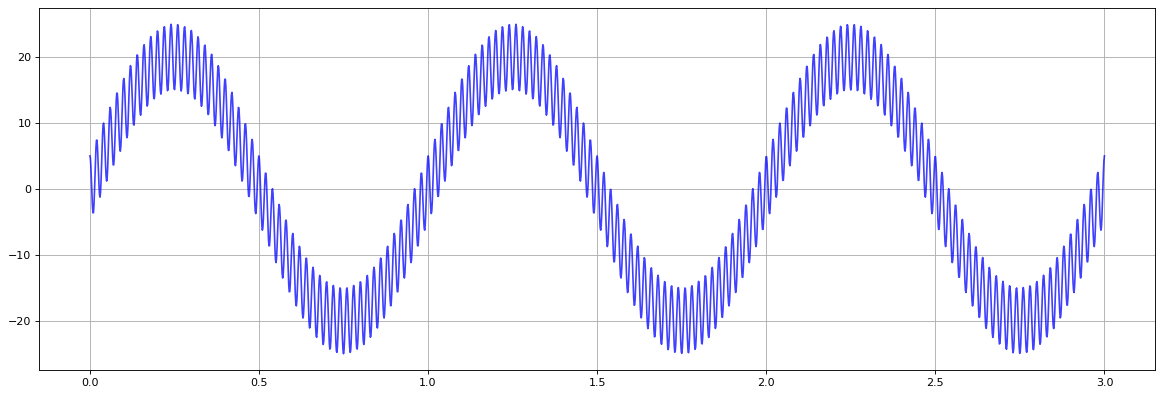

In [42]:
import numpy as np
from scipy import signal
import matplotlib.pyplot as plt
t = np.linspace(0, 3, 2001)
x = (20*np.sin(2*np.pi*1*t) + 
     5*np.cos(2*np.pi*50*t)
    )
xn = x

plt.figure(num=None, figsize=(18, 6), dpi=80, facecolor='w', edgecolor='k')
plt.plot(t, xn, 'b', alpha=0.75)
plt.grid(True)
plt.show()

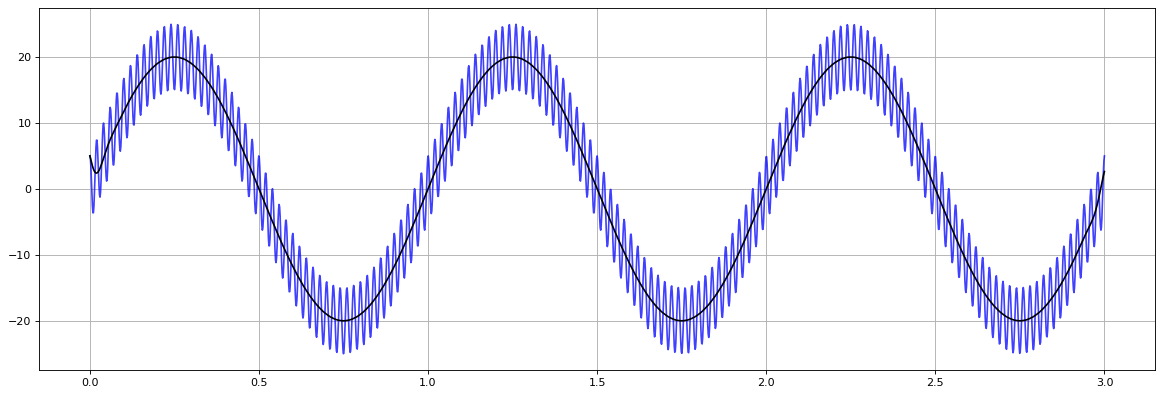

In [45]:
#Solution
#Create an order 3 lowpass butterworth filter:

b, a = signal.butter(3, 0.05, 'lp')

#Use filtfilt to apply the filter:
y = signal.filtfilt(b, a, xn)

plt.figure(num=None, figsize=(18, 6), dpi=80, facecolor='w', edgecolor='k')
plt.plot(t, xn, 'b', alpha=0.75)
plt.plot(t, y, 'k')
plt.grid(True)
plt.show()

#the black line shows the filtered out signal compare to the blue line which contains 50hz with 1 hz. while black line only contains 1hz

<ol start="18">
<li>
Use the appropriate algorithm to decompose the following signal into its frequency components and plot the results to visualize the component frequencies in the frequency domain.
</li> </ol>

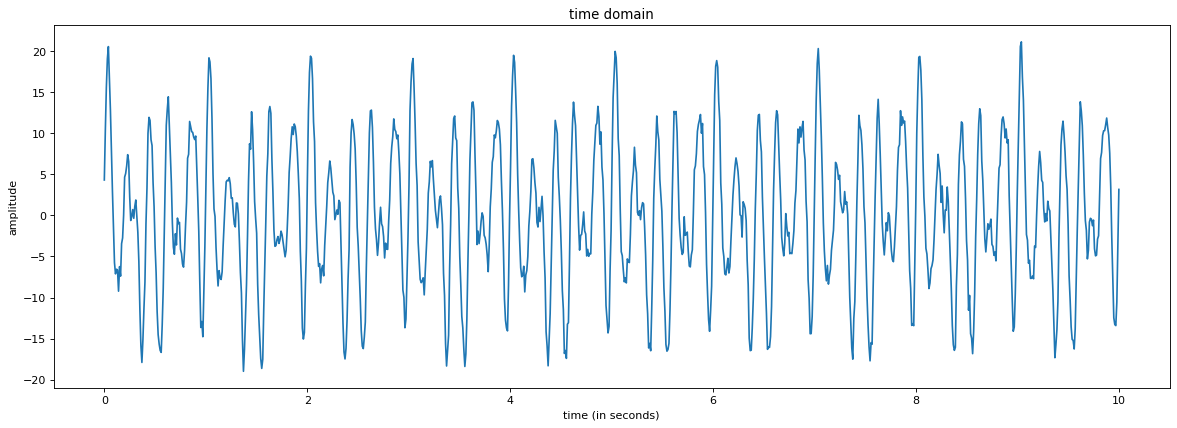

In [46]:
%matplotlib inline
import matplotlib.pyplot as plt
import scipy
import numpy as np

# Graphing helper function
def setup_graph(title='', x_label='', y_label='', fig_size=None):
    fig = plt.figure(num=None, figsize=(18, 6), dpi=80, facecolor='w', edgecolor='k')
    if fig_size != None:
        fig.set_size_inches(fig_size[0], fig_size[1])
    ax = fig.add_subplot(111)
    ax.set_title(title)
    ax.set_xlabel(x_label)
    ax.set_ylabel(y_label)



time_to_plot = 10 # second
sample_rate = 100 # samples per second
num_samples = sample_rate * time_to_plot

t = np.linspace(0, time_to_plot, num_samples)
signal1 = [3 * np.sin(1 * i * 2*np.pi+2) for i in t] 
signal2 = [10 * np.sin(5 * i * 2*np.pi) for i in t] 
signal3 = [6 * np.sin(7 * i * 2*np.pi) for i in t] 
signal4 = [3 * np.sin(10 * i * 2*np.pi) for i in t] 
noise = np.random.randn(len(signal4))
signalt = [sum(x) for x in zip(signal1,signal2,signal3,signal4+noise)]

setup_graph(x_label='time (in seconds)', y_label='amplitude', title='time domain')
plt.plot(t, signalt)
plt.rcParams.update({'font.size': 10})
plt.figsize=(18, 6)

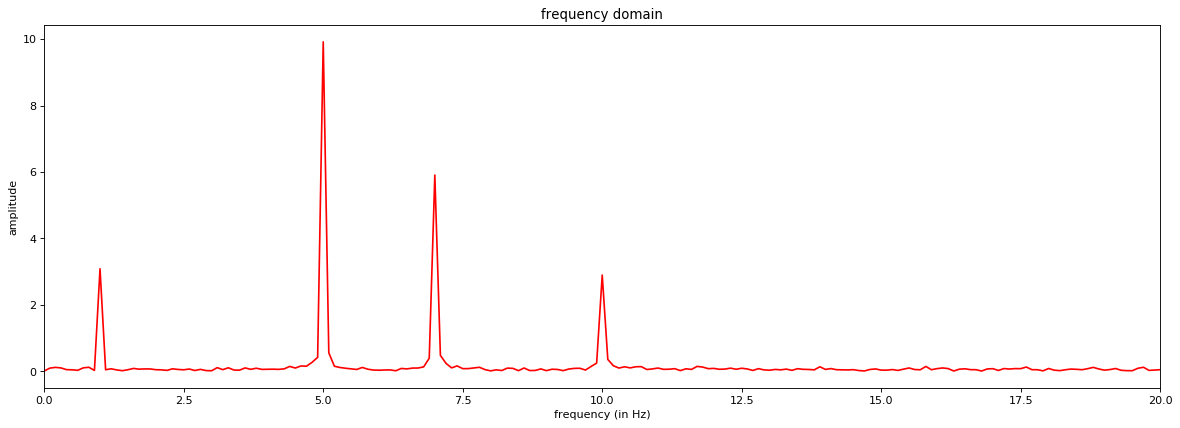

In [47]:
# Solution
fft_output = np.fft.rfft(signalt) #fft_output is the frequency domain representation of the signal

magnitude_only = [np.sqrt(i.real**2 + i.imag**2)/len(fft_output) for i in fft_output]

frequencies = [(i*1.0/num_samples)*sample_rate for i in range(int(num_samples/2+1))]

setup_graph(x_label='frequency (in Hz)', y_label='amplitude', title='frequency domain')
plt.plot(frequencies, magnitude_only, 'r')
plt.xlim([0,20])
plt.rcParams.update({'font.size': 14})

In [48]:
#Frequency domain is at around 1.2hz,5hz,7hz,10hz

<ol start="19">
<li>
The file `./resources/eegSignal` contains a 20 second EEG recording of a human brain at electrode C4 situated over the right motor cortex. I have heavily preprocessed the signal to make this exercise easier by substracting a common average from the electrode and applying a bandpass filter (4-30Hz range).  Using the concept of mu rhythms desynchronization, estimate at what time the person is imagining the movement of the left hand. 
</li> </ol>
Hints: 

- Use the proper algorithmic transformation that allows you to visualize a signal simultaneously in both the time and the frequency domains.
- The signal was sampled at 512 samples per second. 
- For easier visualization, the number of data points to use in each FFT block should be 2048.
- The number of points of overlap between blocks should be zero.
- Do not expect a massive effect size. The signal is subtle, this problem is hard. You are detecting a human thought from electrical activity captured with sensors on the surface of the scalp.

<img src="./images/EEGelectrodes.png" width=70%>

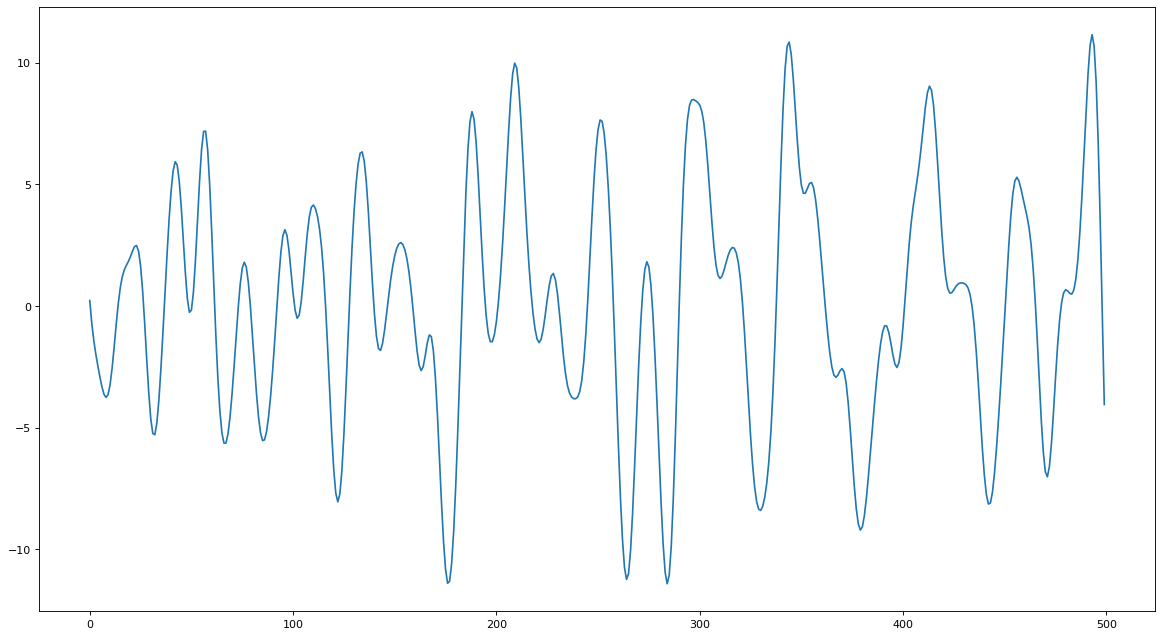

In [49]:
#Loading the EEG signal
import pickle
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline
with open('./resources/eegSignal','rb') as fileHandler:
    eegSignal=pickle.load(fileHandler)

fig=plt.figure(num=None, figsize=(18, 10), dpi=80, facecolor='w', edgecolor='k')
# plotting the aggregate action potentials of millions of neurons for a brief time interval
plt.plot(eegSignal[8000:8500])    

In [50]:
# Solution
def setup_graph(title='', x_label='', y_label='', fig_size=None):
    fig = plt.figure(num=None, figsize=(18, 6), dpi=80, facecolor='w', edgecolor='k')
    if fig_size != None:
        fig.set_size_inches(fig_size[0], fig_size[1])
    ax = fig.add_subplot(111)
    ax.set_title(title)
    ax.set_xlabel(x_label)
    ax.set_ylabel(y_label)



10240


(0.0, 20.0, 4, 20)

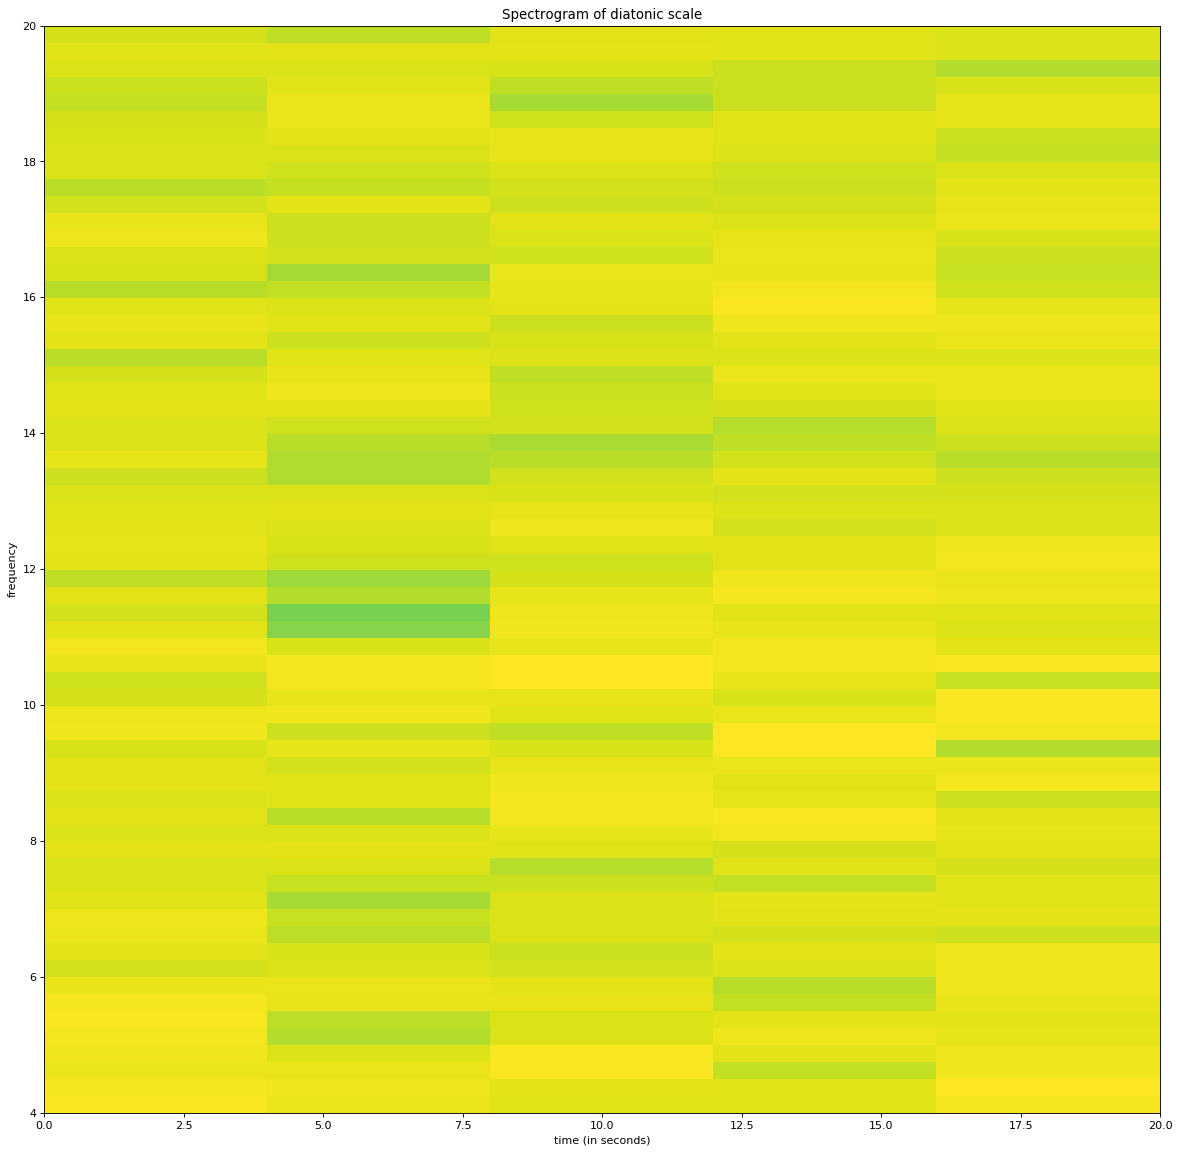

In [51]:
from scipy import signal
eeg_Sig = [eegSignal[i] for i in range(0, len(eegSignal), 10240//512)]
b, a = signal.butter(3, 0.5, 'lp')

#Use filtfilt to apply the filter:
y = signal.filtfilt(b, a, eegSignal)
print(len(y))
setup_graph(title='Spectrogram of diatonic scale', x_label='time (in seconds)', y_label='frequency', fig_size=(18,18))
_ = plt.specgram(eegSignal, Fs=512, NFFT=2048, noverlap=0)
plt.axis(ymin=4,ymax=20)

In [52]:
#The person is moving his hand at around 4 seconds to 8 seconds

### Deliverables

<ol start="20">
<li>You should hand in this python notebook file (.ipynb) containing all the necessary code to answer each of the previously enumerated tasks. Answer each question in its corresponding Solution code cell. Make sure that embedded tests work. Use comments also to provide answers to questions expecting a natural language written answer.  If there is no test cell for a given problem, after you implement a solution, use a bit of additional code to demonstrate that your solution works. Please, make sure your code runs smoothly so I can execute it in my computer. Name your Python notebook according to the following pattern: `yourLastName_AA_A2.ipynb`.  
</li></ol> 

Create your own private repository for you to work on the assignment by using the following link: [https://classroom.github.com/a/aOi2slPQ](https://classroom.github.com/a/aOi2slPQ) I will subsequently fetch the repository you created on the date the assignment is due.